In [66]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


In [67]:
dat = pd.read_csv('data.csv')

<AxesSubplot:>

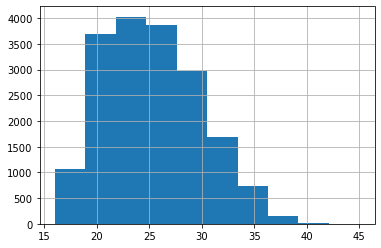

In [68]:
dat['Age'].hist()

In [72]:
df1 = pd.DataFrame(dat, columns=['Name', 'Wage', 'Value'])
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('€', '').replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('€', '').replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('€', '').replace('B', '')) * 1000000000
    return 0.0

df1['Value'] = df1['Value'].apply(value_to_float)
df1['Wage'] = df1['Wage'].apply(value_to_float)
df1['difference'] = df1['Value']-df1['Wage']
df1 = df1.sort_values('difference', ascending=False)

In [70]:
df1

,Name,Wage,Value,difference
2,Neymar Jr,€290K,€118.5M,118210000.0
0,L. Messi,€565K,€110.5M,109935000.0
4,K. De Bruyne,€355K,€102M,101645000.0
5,E. Hazard,€340K,€93M,92660000.0
15,P. Dybala,€205K,€89M,88795000.0
...,...,...,...,...
17752,S. Phillips,€1K,€0,-1000.0
12192,H. Sulaimani,€3K,€0,-3000.0
3550,S. Nakamura,€4K,€0,-4000.0
4228,B. Nivet,€5K,€0,-5000.0


<AxesSubplot:xlabel='Wage', ylabel='Value'>

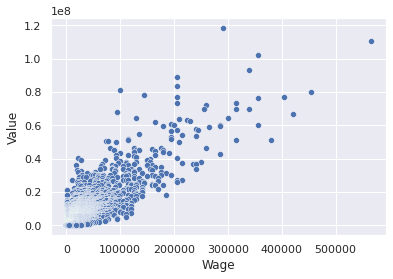

In [73]:
sns.set()

graph = sns.scatterplot(x = 'Wage', y = 'Value', data=df1)
graph

In [85]:
from bokeh.plotting import figure
from bokeh.models import HoverTool
from bokeh.io import save, output_file, show

TOOLTIPS = HoverTool(
    tooltips=[
    ('index', '$index'),
    ('(Wage, Value)', '(@Wage, @Value)'),
    ('Name', '@Name')]
)

p = figure(title="Soccer 2019 Value vs Wage", x_axis_label='Wage', y_axis_label='Value', plot_width=700, plot_height=700, tools=[TOOLTIPS])
p.circle('Wage', 'Value', size=10, source=df1)
save(p, 'scatter.html')


'/mnt/d/github/python_dev/sec21_ML/scatter.html'